In [ ]:
# Setup environment
!apt-get -qq install xxd
!pip install pandas numpy matplotlib
%tensorflow_version 2.x
!pip install tensorflow

Selecting previously unselected package xxd.
(Reading database ... 148486 files and directories currently installed.)
Preparing to unpack .../xxd_2%3a8.0.1453-1ubuntu1.4_amd64.deb ...
Unpacking xxd (2:8.0.1453-1ubuntu1.4) ...
Setting up xxd (2:8.0.1453-1ubuntu1.4) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


TensorFlow version = 2.6.0

fire class will be output 0 of the classifier
158 samples captured for training with inputs ['Red', 'Green', 'Blue'] 



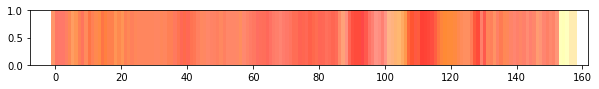

room class will be output 1 of the classifier
306 samples captured for training with inputs ['Red', 'Green', 'Blue'] 



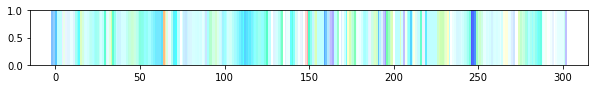

Data set parsing and preparation complete.
Data set randomization and splitting complete.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import fileinput

print(f"TensorFlow version = {tf.__version__}\n")

# Set a fixed random seed value, for reproducibility, this will allow us to get
# the same random numbers each time the notebook is run
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)

CLASSES = [];

for file in os.listdir("/content/"):
    if file.endswith(".csv"):
        CLASSES.append(os.path.splitext(file)[0])

CLASSES.sort()

SAMPLES_WINDOW_LEN = 1
NUM_CLASSES = len(CLASSES)

# create a one-hot encoded matrix that is used in the output
ONE_HOT_ENCODED_CLASSES = np.eye(NUM_CLASSES)

inputs = []
outputs = []

# read each csv file and push an input and output
for class_index in range(NUM_CLASSES):
  objectClass = CLASSES[class_index]
  df = pd.read_csv("/content/" + objectClass + ".csv")
  columns = list(df)
  # get rid of pesky empty value lines of csv which cause NaN inputs to TensorFlow
  df = df.dropna()
  df = df.reset_index(drop=True)
   
  # calculate the number of objectClass recordings in the file
  num_recordings = int(df.shape[0] / SAMPLES_WINDOW_LEN)
  print(f"\u001b[32;4m{objectClass}\u001b[0m class will be output \u001b[32m{class_index}\u001b[0m of the classifier")
  print(f"{num_recordings} samples captured for training with inputs {list(df)} \n")

  # graphing
  plt.rcParams["figure.figsize"] = (10,1)
  pixels = np.array([df['Red'],df['Green'],df['Blue']],float)
  pixels = np.transpose(pixels)
  for i in range(num_recordings):
    plt.axvline(x=i, linewidth=8, color=tuple(pixels[i]/np.max(pixels[i], axis=0)))
  plt.show()
  
  #tensors
  output = ONE_HOT_ENCODED_CLASSES[class_index]
  for i in range(num_recordings):
    tensor = []
    row = []
    for c in columns:
      row.append(df[c][i])
    tensor += row
    inputs.append(tensor)
    outputs.append(output)

# convert the list to numpy array
inputs = np.array(inputs)
outputs = np.array(outputs)

print("Data set parsing and preparation complete.")

# Randomize the order of the inputs, so they can be evenly distributed for training, testing, and validation
# https://stackoverflow.com/a/37710486/2020087
num_inputs = len(inputs)
randomize = np.arange(num_inputs)
np.random.shuffle(randomize)

# Swap the consecutive indexes (0, 1, 2, etc) with the randomized indexes
inputs = inputs[randomize]
outputs = outputs[randomize]

# Split the recordings (group of samples) into three sets: training, testing and validation
TRAIN_SPLIT = int(0.6 * num_inputs)
TEST_SPLIT = int(0.2 * num_inputs + TRAIN_SPLIT)

inputs_train, inputs_test, inputs_validate = np.split(inputs, [TRAIN_SPLIT, TEST_SPLIT])
outputs_train, outputs_test, outputs_validate = np.split(outputs, [TRAIN_SPLIT, TEST_SPLIT])

print("Data set randomization and splitting complete.")


In [ ]:
# build the model and train it
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8, activation='relu')) # relu is used for performance
model.add(tf.keras.layers.Dense(5, activation='relu'))
model.add(tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')) # softmax is used, because we only expect one class to occur per input
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(inputs_train, outputs_train, epochs=400, batch_size=4, validation_data=(inputs_validate, outputs_validate))



Epoch 1/400
70/70 [==============================] - 1s 4ms/step - loss: 0.2262 - mae: 0.4740 - val_loss: 0.2102 - val_mae: 0.4541
Epoch 2/400
70/70 [==============================] - 0s 2ms/step - loss: 0.2007 - mae: 0.4395 - val_loss: 0.1849 - val_mae: 0.4179
Epoch 3/400
70/70 [==============================] - 0s 2ms/step - loss: 0.1783 - mae: 0.4071 - val_loss: 0.1621 - val_mae: 0.3833
Epoch 4/400
70/70 [==============================] - 0s 2ms/step - loss: 0.1580 - mae: 0.3763 - val_loss: 0.1392 - val_mae: 0.3529
Epoch 5/400
70/70 [==============================] - 0s 2ms/step - loss: 0.1351 - mae: 0.3444 - val_loss: 0.1153 - val_mae: 0.3176
Epoch 6/400
70/70 [==============================] - 0s 2ms/step - loss: 0.1128 - mae: 0.3098 - val_loss: 0.0928 - val_mae: 0.2842
Epoch 7/400
70/70 [==============================] - 0s 2ms/step - loss: 0.0906 - mae: 0.2763 - val_loss: 0.0711 - val_mae: 0.2454
Epoch 8/400
70/70 [==============================] - 0s 2ms/step - loss: 0.0707 - m

predictions =
 [[0.998 0.002]
 [0.001 0.999]
 [0.999 0.001]
 [0.087 0.913]
 [0.997 0.003]
 [0.164 0.836]
 [0.994 0.006]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.012 0.988]
 [0.997 0.003]
 [0.001 0.999]
 [0.995 0.005]
 [0.999 0.001]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.997 0.003]
 [0.997 0.003]
 [0.    1.   ]
 [0.002 0.998]
 [0.997 0.003]
 [0.    1.   ]
 [0.998 0.002]
 [0.001 0.999]
 [0.    1.   ]
 [0.996 0.004]
 [0.    1.   ]
 [0.998 0.002]
 [0.001 0.999]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.015 0.985]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.998 0.002]
 [0.998 0.002]
 [0.997 0.003]
 [0.    1.   ]
 [0.997 0.003]
 [0.    1.   ]
 [0.    1.   ]
 [0.997 0.003]
 [0.998 0.002]
 [0.    1.   ]
 [0.997 0.003]
 [0.006 0.994]
 [0.998 0.002]
 [0.987 0.013]
 [0.001 0.999]
 [0.    1.   ]
 [0.003 0.997]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.997 0.003]
 [0.998 0.002]
 [0.    1.   ]
 [0.001 0.999]
 [0.    1.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: cycling among columns of inputs with non-matching shapes is deprecated.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: cycling among columns of inputs with non-matching shapes is deprecated.
  if sys.path[0] == '':


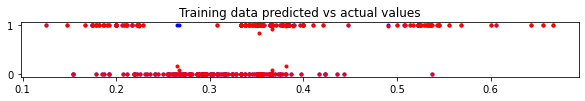

In [ ]:
# use the model to predict the test inputs
predictions = model.predict(inputs_test)

# print the predictions and the expected ouputs
print("predictions =\n", np.round(predictions, decimals=3))
print("actual =\n", outputs_test)

# Plot the predictions along with to the test data
plt.clf()
plt.title('Training data predicted vs actual values')
plt.plot(inputs_test, outputs_test, 'b.', label='Actual')
plt.plot(inputs_test, predictions, 'r.', label='Predicted')
plt.show()

In [ ]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to disk
open("gesture_model.tflite", "wb").write(tflite_model)
  
import os
basic_model_size = os.path.getsize("gesture_model.tflite")
print("Model is %d bytes" % basic_model_size)
  
  

INFO:tensorflow:Assets written to: /tmp/tmpcsmhvzfs/assets
Model is 2132 bytes


In [ ]:
!echo "const unsigned char model[] = {" > /content/model.h
!cat gesture_model.tflite | xxd -i      >> /content/model.h
!echo "};"                              >> /content/model.h

import os
model_h_size = os.path.getsize("model.h")
print(f"Header file, model.h, is {model_h_size:,} bytes.")
print("\nOpen the side panel (refresh if needed). Double click model.h to download the file.")

Header file, model.h, is 13,182 bytes.

Open the side panel (refresh if needed). Double click model.h to download the file.
